In [24]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import sys
import importlib
import numpy as np

sys.path.insert(0, "../kNN_NBC/x64/Release")
import pynbc

# Experiment 1 - 2 artificial clusters in dataset with different number of neirest neighbours
## kNN

(0, 0)


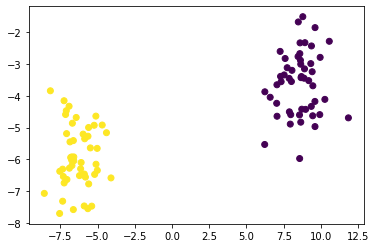

In [7]:
dataset = make_blobs(n_samples = 100, centers = 2, n_features = 2, random_state = 12345)
plt.scatter(dataset[0][:,0], dataset[0][:,1], c = dataset[1])

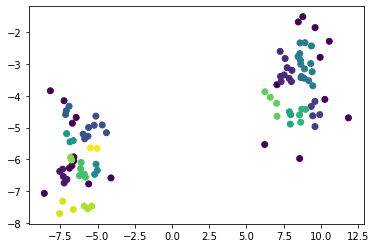

In [9]:
clusters = pynbc.nbc_kNN(2, 0, dataset[0])
plt.scatter(dataset[0][:,0], dataset[0][:,1], c = clusters)

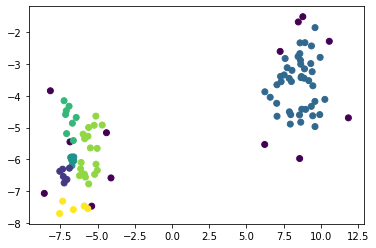

In [10]:
clusters = pynbc.nbc_kNN(4, 0, dataset[0])
plt.scatter(dataset[0][:,0], dataset[0][:,1], c = clusters)

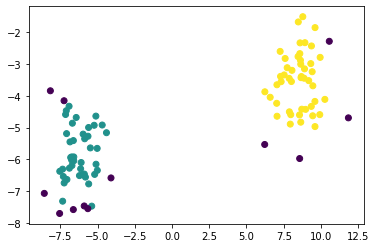

In [11]:
clusters = pynbc.nbc_kNN(8, 0, dataset[0])
plt.scatter(dataset[0][:,0], dataset[0][:,1], c = clusters)

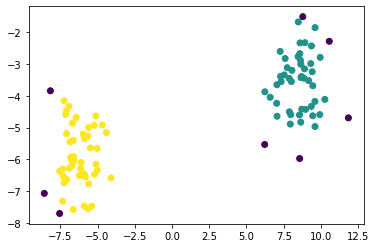

In [12]:
clusters = pynbc.nbc_kNN(16, 0, dataset[0])
plt.scatter(dataset[0][:,0], dataset[0][:,1], c = clusters)

## k+NN

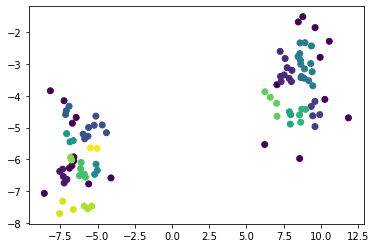

In [13]:
clusters = pynbc.nbc_kpNN(2, 0, dataset[0])
plt.scatter(dataset[0][:,0], dataset[0][:,1], c = clusters)

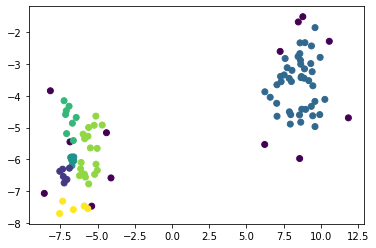

In [14]:
clusters = pynbc.nbc_kpNN(4, 0, dataset[0])
plt.scatter(dataset[0][:,0], dataset[0][:,1], c = clusters)

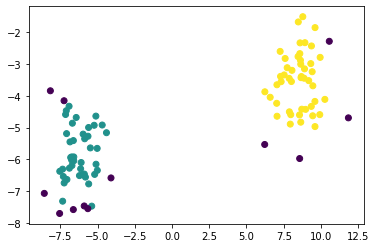

In [15]:
clusters = pynbc.nbc_kpNN(8, 0, dataset[0])
plt.scatter(dataset[0][:,0], dataset[0][:,1], c = clusters)

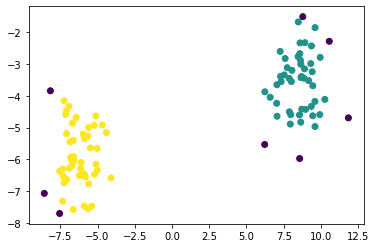

In [16]:
clusters = pynbc.nbc_kpNN(16, 0, dataset[0])
plt.scatter(dataset[0][:,0], dataset[0][:,1], c = clusters)

# Experiment 2 - 4 clusters
## kNN

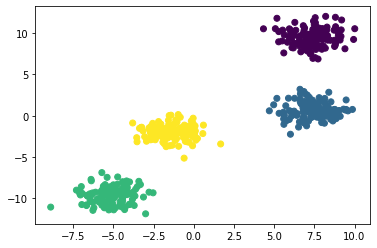

In [17]:
dataset = make_blobs(n_samples = 500, centers = 4, n_features = 2, random_state = 8)
plt.scatter(dataset[0][:,0], dataset[0][:,1], c = dataset[1])

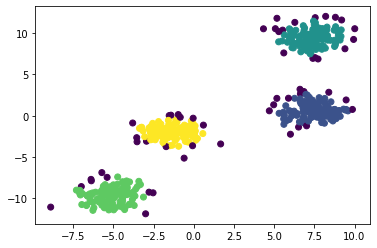

In [19]:
clusters = pynbc.nbc_kNN(int(500 ** 0.5), 0, dataset[0])
plt.scatter(dataset[0][:,0], dataset[0][:,1], c = clusters)

## k+NN

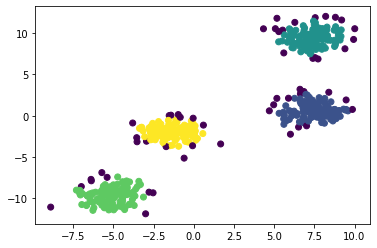

In [22]:
clusters = pynbc.nbc_kpNN(int(500 ** 0.5), 0, dataset[0])
plt.scatter(dataset[0][:,0], dataset[0][:,1], c = clusters)

# Experiment 3 - single cluster and noise

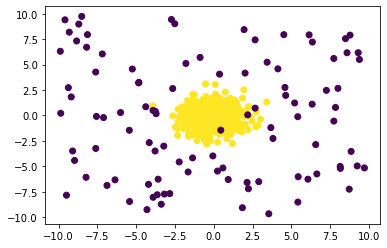

In [33]:
dataset = make_blobs(n_samples = 500, centers = [[0,0]], n_features = 2, cluster_std = 1)
generator = np.random.RandomState(42)
noise = generator.uniform(low = -10, high = 10, size=(100, 2))

dataset = (
    np.concatenate([dataset[0], noise], axis = 0), 
    [*dataset[1], *([-1] * noise.shape[0])]
)

plt.scatter(dataset[0][:,0], dataset[0][:,1], c = dataset[1])

## kNN

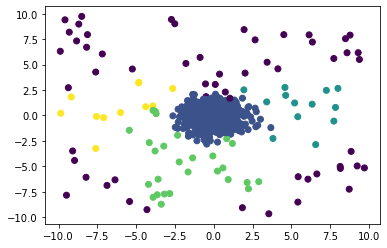

In [34]:
clusters = pynbc.nbc_kNN(int(600 ** 0.5), 0, dataset[0])
plt.scatter(dataset[0][:,0], dataset[0][:,1], c = clusters)

## k+NN

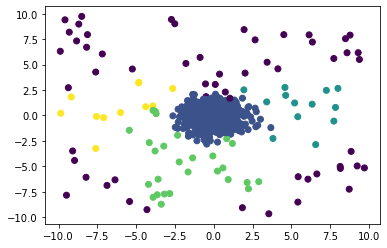

In [35]:
clusters = pynbc.nbc_kpNN(int(600 ** 0.5), 0, dataset[0])
plt.scatter(dataset[0][:,0], dataset[0][:,1], c = clusters)

# Experiment 4 - dataset prepared to give different outputs in kNN and k+NN

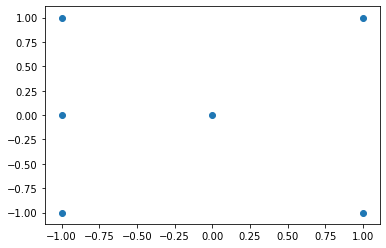

In [50]:
dataset = np.array([[1.0, 1.0], [1.0, -1.0], [-1.0, -1.0], [-1.0, 1.0], [-1.0, 0.0], [0.0, 0.0]])
plt.scatter(dataset[:,0], dataset[:,1])

## kNN

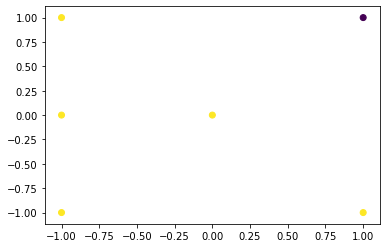

In [56]:
clusters = pynbc.nbc_kNN(1, 0, dataset)
plt.scatter(dataset[:,0], dataset[:,1], c = clusters)

## k+NN

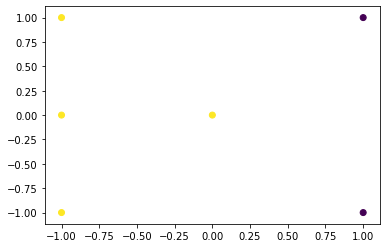

In [55]:
clusters = pynbc.nbc_kpNN(1, 0, dataset)
plt.scatter(dataset[:,0], dataset[:,1], c = clusters)

# Experiment 5: different strategy of choosing reference point

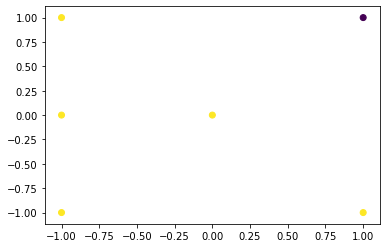

In [57]:
clusters = pynbc.nbc_kNN(1, 0, dataset)
plt.scatter(dataset[:,0], dataset[:,1], c = clusters)

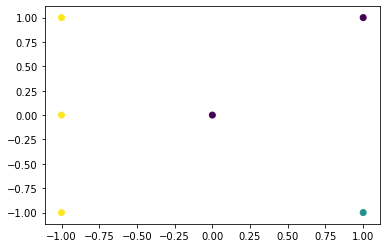

In [58]:
clusters = pynbc.nbc_kNN(1, 1, dataset)
plt.scatter(dataset[:,0], dataset[:,1], c = clusters)

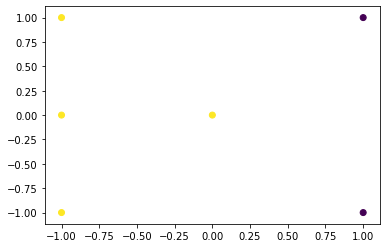

In [59]:
clusters = pynbc.nbc_kpNN(1, 0, dataset)
plt.scatter(dataset[:,0], dataset[:,1], c = clusters)

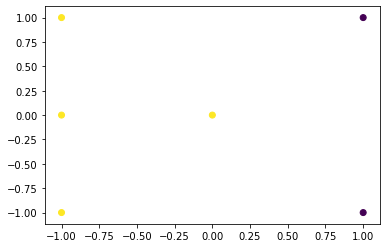

In [60]:
clusters = pynbc.nbc_kpNN(1, 1, dataset)
plt.scatter(dataset[:,0], dataset[:,1], c = clusters)